In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
learning_rate = 0.1
training_epochs = 2000

In [4]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [22]:
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

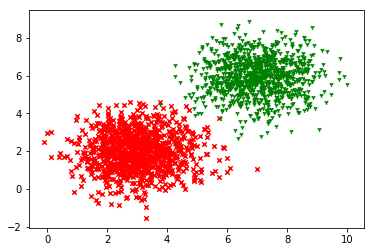

In [23]:
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()

In [24]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

In [25]:
y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

0 0.6931461
1 0.60934126
2 0.6027573
3 0.597966
4 0.59330446
5 0.58875793
6 0.5843218
7 0.5799916
8 0.5757631
9 0.57163244
10 0.5675956
11 0.5636488
12 0.5597886
13 0.5560116
14 0.55231446
15 0.548694
16 0.5451474
17 0.54167175
18 0.53826433
19 0.53492254
20 0.53164405
21 0.5284262
22 0.52526695
23 0.5221639
24 0.5191154
25 0.51611924
26 0.5131736
27 0.51027673
28 0.5074268
29 0.5046226
30 0.501862
31 0.49914387
32 0.49646673
33 0.4938293
34 0.49123034
35 0.48866853
36 0.48614258
37 0.48365155
38 0.48119447
39 0.47877014
40 0.47637758
41 0.47401598
42 0.4716844
43 0.4693819
44 0.4671078
45 0.4648613
46 0.4626417
47 0.46044806
48 0.45828
49 0.45613658
50 0.45401752
51 0.45192182
52 0.44984925
53 0.44779894
54 0.44577062
55 0.4437636
56 0.44177762
57 0.43981194
58 0.4378662
59 0.43594012
60 0.43403295
61 0.43214464
62 0.43027464
63 0.4284226
64 0.42658815
65 0.42477074
66 0.4229705
67 0.42118666
68 0.41941908
69 0.41766754
70 0.41593164
71 0.41421118
72 0.4125058
73 0.41081527
74 0.40913

611 0.13260242
612 0.13245101
613 0.13230005
614 0.13214944
615 0.13199927
616 0.13184947
617 0.13170007
618 0.13155107
619 0.13140249
620 0.13125427
621 0.13110648
622 0.13095905
623 0.13081202
624 0.13066538
625 0.1305191
626 0.13037322
627 0.13022774
628 0.13008265
629 0.12993793
630 0.12979355
631 0.12964956
632 0.12950598
633 0.12936278
634 0.12921987
635 0.12907742
636 0.1289353
637 0.12879357
638 0.12865216
639 0.12851118
640 0.12837052
641 0.12823023
642 0.12809032
643 0.12795076
644 0.12781155
645 0.1276727
646 0.12753418
647 0.12739606
648 0.12725826
649 0.12712082
650 0.12698372
651 0.126847
652 0.12671061
653 0.12657456
654 0.12643884
655 0.12630351
656 0.12616847
657 0.1260338
658 0.12589946
659 0.12576547
660 0.12563181
661 0.12549849
662 0.12536548
663 0.12523283
664 0.12510052
665 0.12496848
666 0.1248368
667 0.12470548
668 0.12457446
669 0.124443755
670 0.124313414
671 0.12418337
672 0.12405362
673 0.12392423
674 0.12379517
675 0.12366638
676 0.123537935
677 0.12340981

In [27]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test * w_val[2] - x1_test * w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)


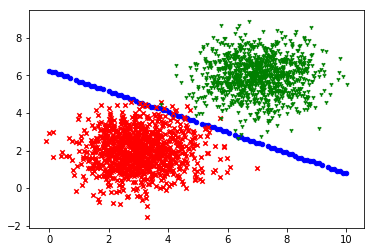

In [28]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()